# Implementación K-Means (K-Medias)

In [39]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

# Cargamos el dataset
dataframe = pd.read_csv('global_oc_index.csv')
#print(dataframe)
# Datos de interés
X = dataframe[['Country', 'Criminality avg,', 'Criminal markets avg,', 'Criminal actors avg,']]
print(X.head())

                    Country  Criminality avg,  Criminal markets avg,  \
0               Afghanistan              7.10                   7.00   
1                     Libya              6.93                   6.57   
2                   Myanmar              8.15                   7.70   
3                     Yemen              6.57                   5.63   
4  Central African Republic              6.75                   5.60   

   Criminal actors avg,  
0                   7.2  
1                   7.3  
2                   8.6  
3                   7.5  
4                   7.9  


Obtenemos el mejor k (numero de clusters) usando el método elbow (codo)

c:\Users\angel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\angel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\angel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\angel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

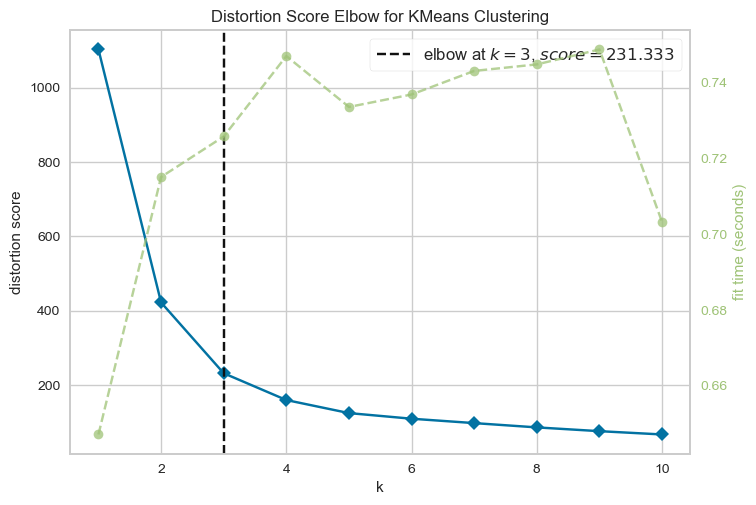

El mejor valor para k de acuerdo con elbow es: 3


In [40]:
# El Codo
modelo_prueba = KMeans(random_state=42, n_init=10)
elbow_visualizer = KElbowVisualizer(modelo_prueba, k=(1, 11))
elbow_visualizer.fit(X[['Criminality avg,', 'Criminal markets avg,', 'Criminal actors avg,']]) 
elbow_visualizer.show() 
best_k = elbow_visualizer.elbow_value_
print(f"El mejor valor para k de acuerdo con elbow es: {best_k}")

Gráfica de silueta para k numeros de clusters (2 a 6)

c:\Users\angel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


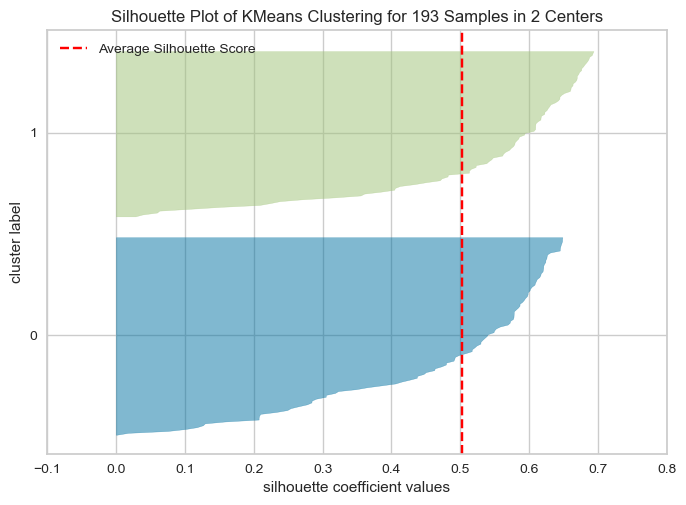

Silhouette Score: 0.50


c:\Users\angel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


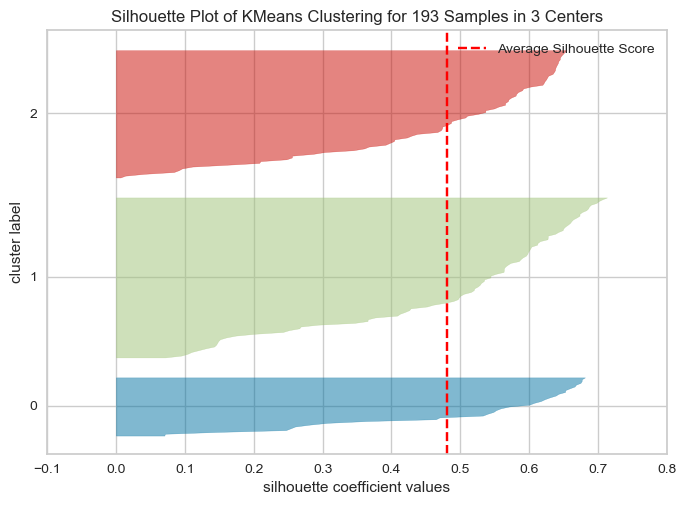

Silhouette Score: 0.48


c:\Users\angel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


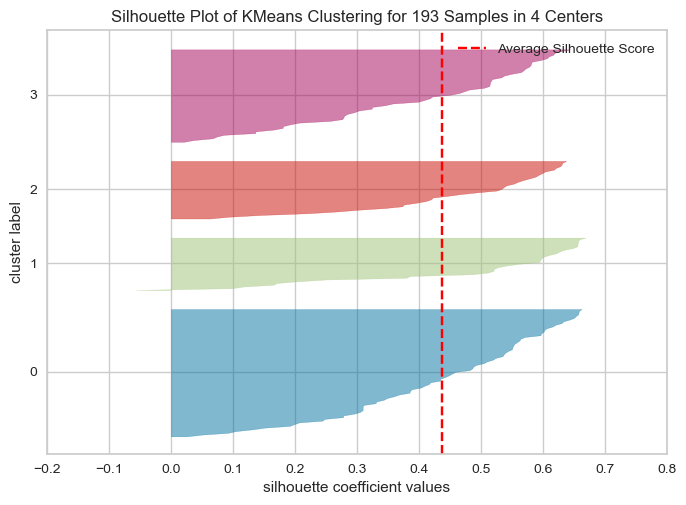

Silhouette Score: 0.44


c:\Users\angel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


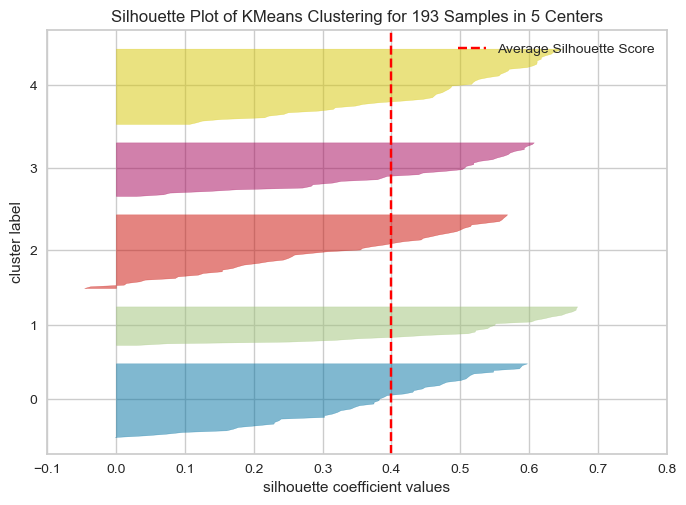

Silhouette Score: 0.40


c:\Users\angel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


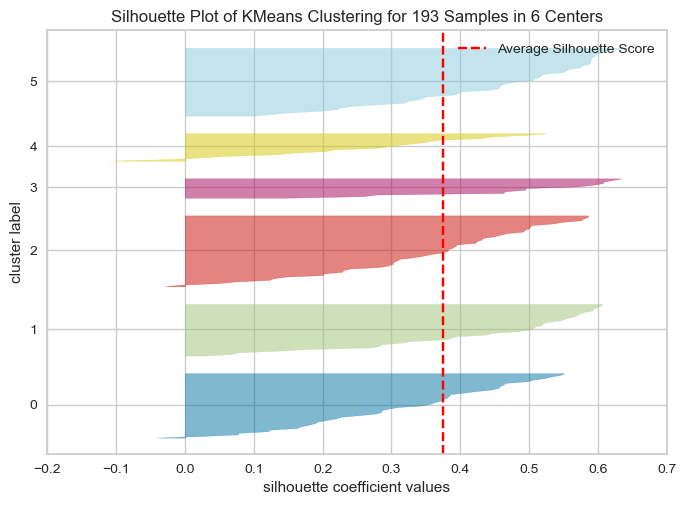

Silhouette Score: 0.38


In [41]:
# Silueta
for k in range(2,7):
    modelo_prueba = KMeans(n_clusters=k, random_state=42,n_init=10)
    silhouette_visualizer = SilhouetteVisualizer(modelo_prueba, colors='yellowbrick') 
    silhouette_visualizer.fit(X[['Criminality avg,', 'Criminal markets avg,', 'Criminal actors avg,']])
    score = silhouette_visualizer.silhouette_score_
    silhouette_visualizer.show()
    print(f"Silhouette Score: {score:.2f}")

plt.show()

## Implementación de K-means con best_k

c:\Users\angel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


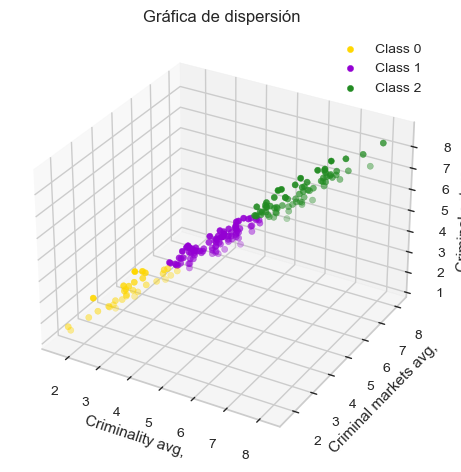


Métricas de rendimiento

Coeficiente de silueta: 0.4801
Índice de Davies-Bouldin: 0.6490
Índice de Calinski-Harabasz: 357.9086


In [42]:
#Inicialización para algoritmo de clustering con el parámetro K indicado por el método del codo
kmeansModel = KMeans(n_clusters=best_k,random_state=42, n_init=10)

#Carga los datos
kmeansModel.fit(X[['Criminality avg,', 'Criminal markets avg,', 'Criminal actors avg,']])

#Obtiene los centroides
centroides = kmeansModel.cluster_centers_

#Obtiene una lista con las etiquetas de los datos
etiqueta = kmeansModel.predict(X[['Criminality avg,', 'Criminal markets avg,', 'Criminal actors avg,']])

# Agrega al frame de datos una columna para las etiquetas de clasificación al dataframe original
dataframe['Class'] = etiqueta

# Crear una figura
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Colores para las diferentes clases
colors = ['magenta', 'lime', 'cyan','red','royalblue','chocolate','gold','darkviolet','forestgreen','gray']

# Graficar los datos
for i in range(best_k):
    # Seleccionar puntos de la clase i
    xs = dataframe[dataframe['Class'] == i]['Criminality avg,']
    ys = dataframe[dataframe['Class'] == i]['Criminal markets avg,']
    zs = dataframe[dataframe['Class'] == i]['Criminal actors avg,']
    ax.scatter(xs, ys, zs, c=colors[i+6], label=f'Class {i}')


# Etiquetas de los ejes
ax.set_xlabel('Criminality avg,')
ax.set_ylabel('Criminal markets avg,')
ax.set_zlabel('Criminal actors avg,')

# Título y leyenda
ax.set_title('Gráfica de dispersión')
ax.legend()
plt.show()


print("\nMétricas de rendimiento\n")

# Evaluar el coeficiente de silueta
silhouette_avg = silhouette_score(X[['Criminality avg,', 'Criminal markets avg,', 'Criminal actors avg,']], kmeansModel.labels_)
print(f"Coeficiente de silueta: {silhouette_avg:.4f}")

# Evaluar el índice de Davies-Bouldin
db_index = davies_bouldin_score(X[['Criminality avg,', 'Criminal markets avg,', 'Criminal actors avg,']], kmeansModel.labels_)
print(f"Índice de Davies-Bouldin: {db_index:.4f}")

# Evaluar el índice de Calinski-Harabasz
ch_index = calinski_harabasz_score(X[['Criminality avg,', 'Criminal markets avg,', 'Criminal actors avg,']], kmeansModel.labels_)
print(f"Índice de Calinski-Harabasz: {ch_index:.4f}")

# Guardar el dataframe con las etiquetas de clasificación
dataframe.to_csv('global_oc_index_class.csv', index=False)

## Resultados

In [56]:
# Lista de países por clase
for i in range(best_k):
    print(f"Clase {i}:")
    print(dataframe[dataframe['Class'] == i]['Country'].values)
    print("\n")

Clase 0:
['Kiribati' 'Antigua and Barbuda' 'Brunei' 'Sao Tome and Principe'
 'St, Kitts and Nevis' 'Nauru' 'Grenada' 'Vanuatu' 'Dominica' 'San Marino'
 'Georgia' 'Tonga' 'Palau' 'Cuba' 'St, Vincent and the Grenadines'
 'Bahamas' 'Rwanda' 'St, Lucia' 'Monaco' 'Armenia' 'Marshall Islands'
 'Samoa' 'Micronesia (Federated States of)' 'Tuvalu' 'Barbados' 'Uruguay'
 'Luxembourg' 'Singapore' 'Norway' 'Andorra' 'Iceland' 'Liechtenstein'
 'Finland']


Clase 1:
['Korea, DPR' 'Burundi' 'Turkmenistan' 'Equatorial Guinea' 'Eritrea'
 'Comoros' 'Chad' 'Tajikistan' 'Guinea-Bissau' 'Suriname' 'Zimbabwe'
 'Guinea' 'Mauritania' 'Liberia' 'Gabon' 'Congo, Rep,' 'Belize' 'eSwatini'
 'Sri Lanka' 'Benin' 'Kyrgyzstan' 'Egypt' 'Timor-Leste' 'Uzbekistan'
 'Lesotho' 'Azerbaijan' 'Sierra Leone' 'Maldives' 'Algeria' 'Djibouti'
 'Bangladesh' 'Cyprus' 'Togo' 'Tunisia' 'Zambia' 'Kazakhstan' 'Namibia'
 'Malawi' 'Morocco' 'Bhutan' 'Dominican Republic' 'Bolivia' 'Hungary'
 'Solomon Islands' 'Albania' 'Malta' 'Greece' 'Ga

C:\Users\angel\AppData\Local\Temp\ipykernel_16564\2263714659.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


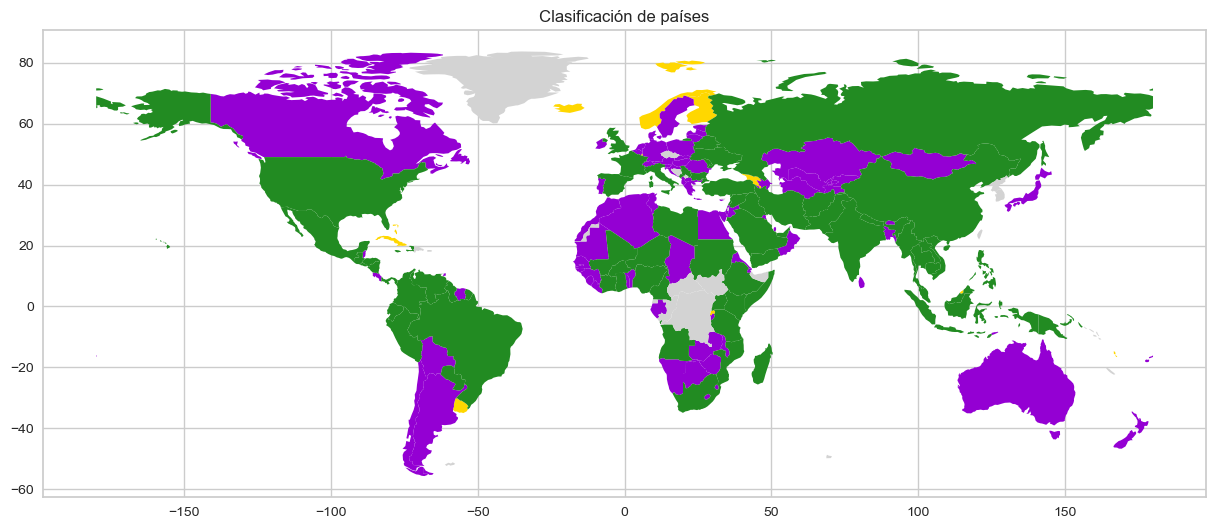

In [55]:
# Mapa del mundo con las clases
import geopandas as gpd

# Cargar el mapa del mundo
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'aspect':'equal'})

# Clase 0
world[world['name'].isin(dataframe[dataframe['Class'] == 0]['Country'])].plot(ax=ax, color='gold', legend=True, label='Class 0')
# Clase 1
world[world['name'].isin(dataframe[dataframe['Class'] == 1]['Country'])].plot(ax=ax, color='darkviolet', legend=True, label='Class 1')
# Clase 2
world[world['name'].isin(dataframe[dataframe['Class'] == 2]['Country'])].plot(ax=ax, color='forestgreen', legend=True, label='Class 2')
# Pintar el resto de los países de gris menos la Antártida
world[(~world['name'].isin(dataframe['Country'])) & (world['name'] != 'Antarctica')].plot(ax=ax, color='lightgrey')
# Título y leyenda
plt.title('Clasificación de países')
# Guarda el mapa en una imagen PNG
#plt.savefig('crime_map.png', dpi=300)
plt.show()